# Analyse des interruptions v5 with evaluation of distribution fit

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
os.chdir("")

## Indication du fichier que l'on va utiliser

In [2]:
file_origine='BA_A_Result.xlsx'

Après analyse de chaque ligne pour déterminer la courbe de distribution la plus adaptée voilà les paramètres à utiliser :
Ligne A = échantillonnage de 1 minutes et result > 1
Ligne B = échantillonnage de 2 minutes et result > 0
Ligne C = échantillonnage de 1 minutes et result > 1
Ligne D = échantillonnage de 2 minutes et result > 1
Ligne E = échantillonnage de 1 minutes, result > 1 et S = S - 1
Ligne H = échantillonnage de X minutes et result > 1
Ligne P = échantillonnage de 5 minutes et result > 1

## Lecture du fichier et intégration dans des Dataframes

In [3]:
#Lecture du fichier origine
xl=pd.ExcelFile(file_origine)
#Mise dans un dataframe
df_origine=xl.parse("Data")
#Affichage des 10 premières lignes du dataframe
df_origine.head(10)

,FR1_FECHA,NUM,FR1_FECHA.1,FR1_LINEA,FR1_TIPO,FR1_REGIST,FR1_ORDEN,FR1_TREN,FR1_CAUC1,FR1_CAUC2,...,Dep_Theo_C1_HP_AM,Dep_Reel_C1_HP_AM,Dep_Theo_C2_HP_PM,Dep_Reel_C2_HP_PM,Dep_Theo_C1_HV,Dep_Theo_C2_HV,Dep_Reel_C1_HV,Dep_Reel_C2_HV,Nb_incident_Interrup_C1,Nb_incident_Interrup_C2
0,2015-01-01,0,2015-01-01,A,F,1,1,4,,,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-01,1,2015-01-01,A,F,2,2,5,,,...,0,0,0,0,0,1,0,1,0,0
2,2015-01-01,2,2015-01-01,A,F,3,3,6,,,...,0,0,0,0,0,1,0,1,0,0
3,2015-01-01,3,2015-01-01,A,F,4,4,1,,,...,0,0,0,0,1,1,1,1,0,0
4,2015-01-01,4,2015-01-01,A,F,5,5,2,,,...,0,0,0,0,1,1,1,1,0,0
5,2015-01-01,5,2015-01-01,A,F,6,6,3,,,...,0,0,0,0,1,1,1,1,0,0
6,2015-01-01,6,2015-01-01,A,F,7,7,4,,,...,0,0,0,0,1,1,1,1,0,0
7,2015-01-01,7,2015-01-01,A,F,8,8,5,,,...,0,0,0,0,1,1,1,1,0,0
8,2015-01-01,8,2015-01-01,A,F,9,9,6,,,...,0,0,0,0,1,1,1,1,0,0
9,2015-01-01,9,2015-01-01,A,F,10,10,1,,,...,0,0,0,0,1,1,1,1,0,0


## Affichage pour rappel du type de données

In [4]:
df_origine.dtypes

FR1_FECHA                  datetime64[ns]
NUM                                 int64
FR1_FECHA.1                datetime64[ns]
FR1_LINEA                          object
FR1_TIPO                           object
FR1_REGIST                          int64
FR1_ORDEN                           int64
FR1_TREN                            int64
FR1_CAUC1                          object
FR1_CAUC2                          object
FR1_COCC1                           int64
FR1_COCC2                           int64
FR1_KM                             object
FR1_KMV                            object
FR1_VIAC1                          object
FR1_VIAC2                          object
FR1_SALC1                          object
FR1_SALC2                          object
FR1_SCAUC2                         object
FR1_SCAUC1                         object
TIPO_DIA                           object
SAISON                             object
PERIODO                             int64
LINEA                             

## Récupération des interruptions à la journée

In [405]:
df_sum = pd.DataFrame()

df_index = df_origine

df_index.set_index(df_index['FR1_FECHA'],inplace=True)

df_sum['Nb_Dep'] = df_index['Desp_HP_C1_AM'].resample('D').sum() 
df_sum['Nb_Dep'] = df_sum['Nb_Dep'] + df_index['Desp_HP_C1_PM'].resample('D').sum() 
df_sum['Nb_Dep'] = df_sum['Nb_Dep'] + df_index['Desp_HP_C2_AM'].resample('D').sum() 
df_sum['Nb_Dep'] = df_sum['Nb_Dep'] + df_index['Desp_HP_C2_PM'].resample('D').sum()
df_sum['Nb_Dep'] = df_sum['Nb_Dep'] + df_index['Desp_HV_C1'].resample('D').sum() 
df_sum['Nb_Dep'] = df_sum['Nb_Dep'] + df_index['Desp_HV_C2'].resample('D').sum() 

df_sum['Sum_Interrup'] = df_index['Interrup_C1'].resample('D').sum()
df_sum['Sum_Interrup'] = df_sum['Sum_Interrup'] + df_index['Interrup_C2'].resample('D').sum()

df_sum['Sum_Interrup'] = df_sum['Sum_Interrup'] * 60 * 24

df_sum['Sum_Interrup_B100'] = 100 * df_sum['Sum_Interrup'] / df_sum['Nb_Dep']
df_sum['Nb_Dep_B100'] = 100

df_sum.head(10)

,Nb_Dep,Sum_Interrup,Sum_Interrup_B100,Nb_Dep_B100
FR1_FECHA,,,,
2015-01-01,190,14.666667,7.719298,100
2015-01-02,270,0.000000,0.000000,100
2015-01-03,270,0.000000,0.000000,100
2015-01-04,190,0.000000,0.000000,100
2015-01-05,420,0.000000,0.000000,100
2015-01-06,420,0.000000,0.000000,100
2015-01-07,420,67.000000,15.952381,100
2015-01-08,420,0.000000,0.000000,100
2015-01-09,420,0.000000,0.000000,100


In [406]:
df_sum.describe()

df_sum['Sum_Interrup_B100'] = np.where(df_sum['Nb_Dep']== 0,0,df_sum['Sum_Interrup_B100'])

df_sum.to_csv('test.csv', index=False, encoding='utf-8', sep=';', decimal=',')

#df_sum['Sum_Interrup_B100'].sum()

## Technique de Bootstrap

### Création de 3 ans de données supplémentaires

In [407]:
df_sum['Sum_Interrup_B100'].describe()

count    1127.000000
mean        1.645254
std        11.480276
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       212.012012
Name: Sum_Interrup_B100, dtype: float64

## Concaténation des données historiques avec les données de Bootstrap

## Création d'un jeu de donnée "Train" et d'un jeu de donnée "Test"

In [408]:
from sklearn.model_selection import train_test_split

X = df_sum

X_train, X_test = train_test_split(X, test_size=0.20)

print(len(X_train), len(X_test))

901 226


## Model data by finding best fit distribution to data

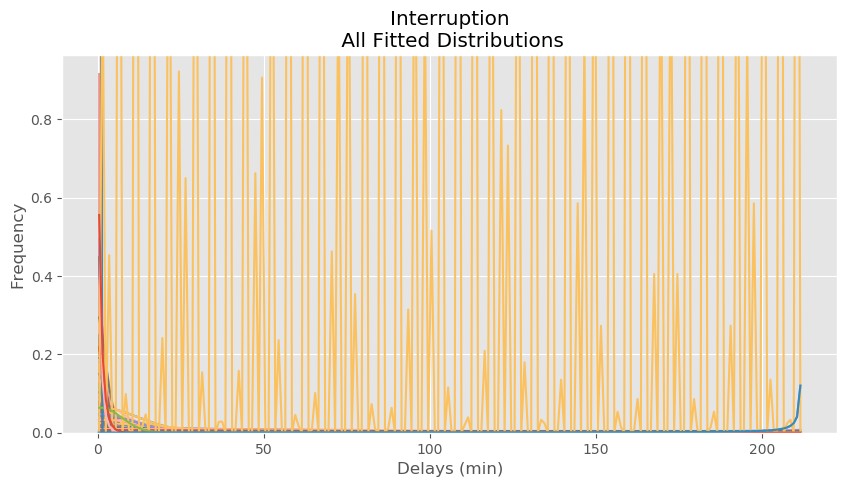

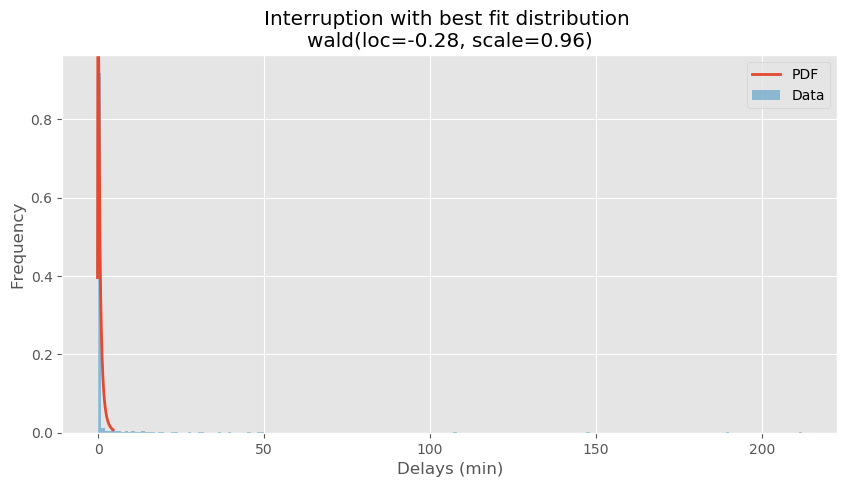

In [409]:
#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=2000, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy#,st.frechet_r
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    sses = []
    
    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                sses.append([sse, distribution.name, params])
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    #Export en CSV
    df = pd.DataFrame(sses)
    filename = 'BA_' + df_origine.iloc[1,3] + '_Interrup_Distribution.csv'
    df.to_csv(filename, index=False, encoding='utf-8', sep=';', decimal=',')
    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=100000):
    """Generate distributions's Propbability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
#data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
#data_temp = df_final[(df_final['Interrup']>0)]
data = X_train['Sum_Interrup_B100']
nb_pas = np.int(data.max() / 1)
nb_pas_2 = np.int(data.max() / 1)

# Plot for comparison
plt.figure(figsize=(10,5), dpi=100)
#plt.xticks(np.linspace(0, 40, 19))
#plt.yticks(np.linspace(0, 0.14, 8))
ax = data.plot(kind='hist', bins=nb_pas, density=True, alpha=0.5, color=plt.rcParams['axes.prop_cycle'].by_key()['color'])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution(data, nb_pas_2, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Interruption\n All Fitted Distributions')
ax.set_xlabel(u'Delays (min)')
ax.set_ylabel('Frequency')

#Enregistrement du graphique
plt.savefig('BA_' + df_origine.iloc[1,3] + '_Interrup_All.png', dpi=200)

# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
fig = plt.figure(figsize=(10,5), dpi=100)
#plt.xticks(np.linspace(0, 40, 7))
#plt.yticks(np.linspace(0, 0.14, 8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=nb_pas, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_ylim(dataYLim)
ax.set_title(u'Interruption with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Delays (min)')
ax.set_ylabel('Frequency')

# manipulate
#vals = ax.get_yticks()
#ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])

#Enregistrement du graphique
plt.savefig('BA_' + df_origine.iloc[1,3] + '_Interrup_Best.png', dpi=200)

## Evaluate the distribution fit

Ma conpréhension des différents 'metrics' :
- Si la valeur MedAE est strictement égal à zéro alors la loi de distribution ne convient pas.
- Par contre, si la valeur MedAE est différent de 0 tout en se rapprochant de zéro alors on continue l'évaluation.
- Now pour comparer deux loi de distributions entre elles après les vérifs précédentes, c'est la valeur de MSE qui la plus petite qui s'approchera le plus des données d'origine.

In [496]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

y_true = X_test['Sum_Interrup_B100']
y_pred = st.exponnorm.rvs(4481.951245982308, -0.0014156800298133483, 0.0003784115380293915, size=len(y_true))
y_pred = np.where(y_pred<1,0,y_pred)

#Best possible score is 1.0, lower values are worse.
print('EVS %f' % explained_variance_score(y_true, y_pred))

#MAE output is non-negative floating point. The best value is 0.0.
print('MAE %f' % mean_absolute_error(y_true, y_pred))

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
print('*MSE %f' % mean_squared_error(y_true, y_pred))

print('*RMSE %f' % np.sqrt(mean_squared_error(y_true, y_pred)))

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
print('MSLE %f' % mean_squared_log_error(y_true, y_pred))

#A positive floating point value (the best value is 0.0).
print('*MedAE %f' % median_absolute_error(y_true, y_pred))

#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
#A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0
print('R2score %f' % r2_score(y_true, y_pred))

EVS -0.055884
MAE 2.655253
*MSE 74.877579
*RMSE 8.653183
MSLE 1.155263
*MedAE 1.106097
R2score -0.055891


In [497]:
print('Sum real data = %f' % y_true.sum())
print('Sum forecast data = %f' % y_pred.sum())

Sum real data = 328.069360
Sum forecast data = 322.929646


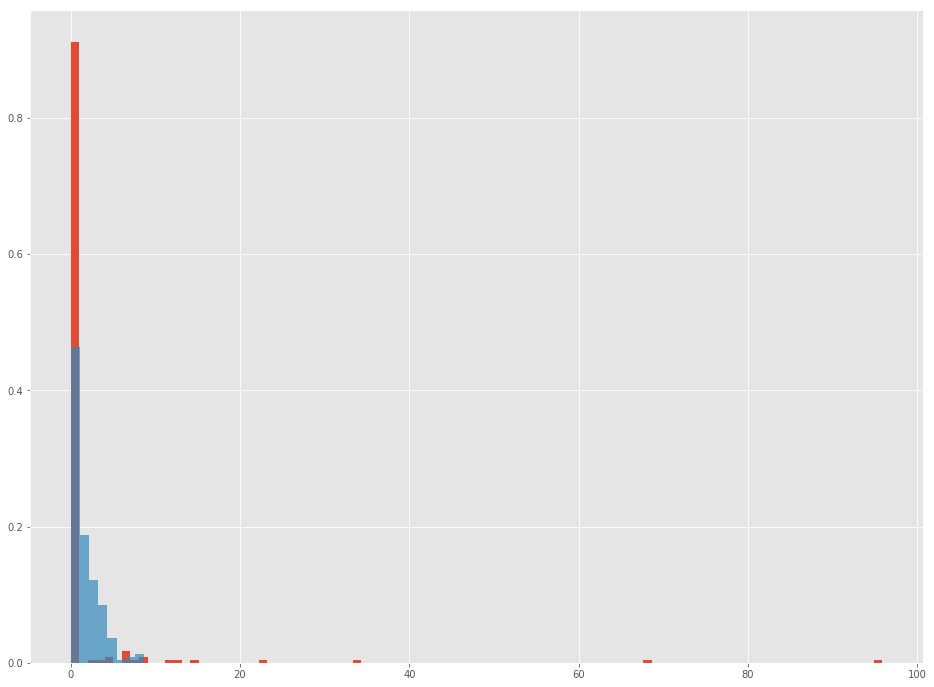

In [498]:
hist = y_true.hist(bins=np.int(y_true.max()/1), density=True)
ax = hist.hist(np.array(y_pred), bins=np.int(y_pred.max()/1), density=True, alpha=0.7)

## Evaluate the distribution fit

In [499]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

y_true = X_test['Sum_Interrup_B100']
y_pred = st.chi.rvs(0.3999962174343664, -6.611048122421208e-27, 15.675190655066615, size=len(y_true))
y_pred = np.where(y_pred<1,0,y_pred)

#Best possible score is 1.0, lower values are worse.
print('EVS %f' % explained_variance_score(y_true, y_pred))

#MAE output is non-negative floating point. The best value is 0.0.
print('MAE %f' % mean_absolute_error(y_true, y_pred))

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
print('*MSE %f' % mean_squared_error(y_true, y_pred))

print('*RMSE %f' % np.sqrt(mean_squared_error(y_true, y_pred)))

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
print('MSLE %f' % mean_squared_log_error(y_true, y_pred))

#A positive floating point value (the best value is 0.0).
print('*MedAE %f' % median_absolute_error(y_true, y_pred))

#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
#A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0
print('R2score %f' % r2_score(y_true, y_pred))

EVS -0.644949
MAE 6.165408
*MSE 130.549926
*RMSE 11.425845
MSLE 2.873217
*MedAE 2.671832
R2score -0.840958


In [500]:
print('Sum real data = %f' % y_true.sum())
print('Sum forecast data = %f' % y_pred.sum())

Sum real data = 328.069360
Sum forecast data = 1170.653071


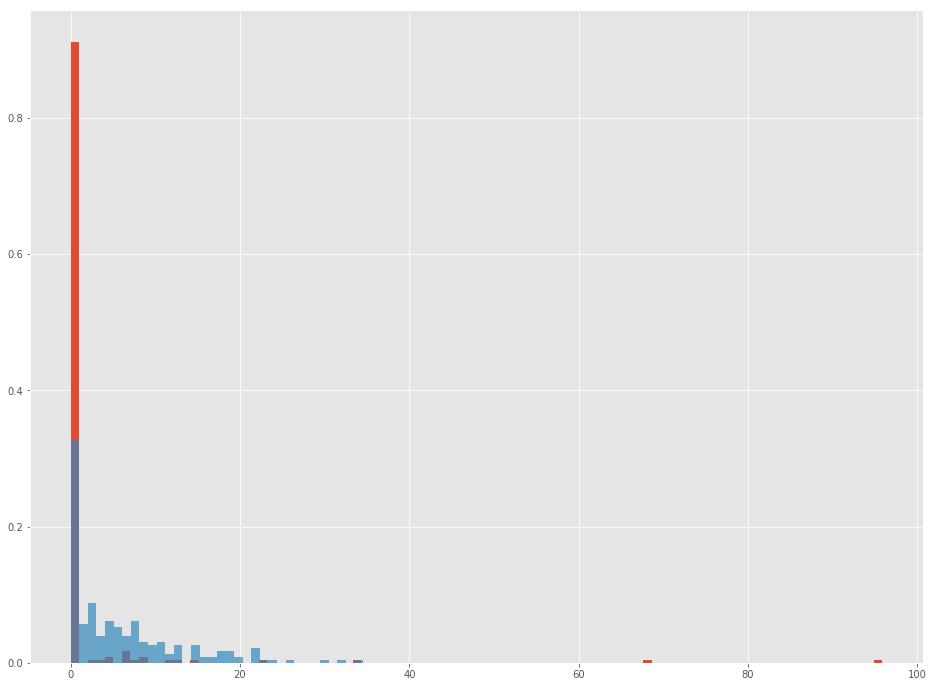

In [490]:
hist = y_true.hist(bins=np.int(y_true.max()/1), density=True)
ax = hist.hist(np.array(y_pred), bins=np.int(y_pred.max()/1), density=True, alpha=0.7)